In [13]:
# loading dataset

import tensorflow as tf
from tensorflow import keras
mnistDB = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnistDB.load_data()

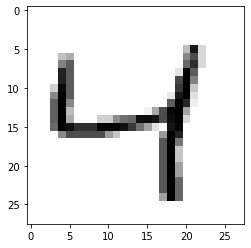

In [14]:
# example image

import matplotlib.pyplot as plt
plt.imshow(x_train[2], cmap = 'binary')

In [15]:
# reshape

x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [10]:
# loading model and creating layers

cnnModel_MNIST = keras.models.Sequential()
cnnModel_MNIST.add(keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = x_train.shape[1:]))
cnnModel_MNIST.add(keras.layers.Conv2D(64, (3, 3), activation = 'relu'))
cnnModel_MNIST.add(keras.layers.MaxPooling2D(2, 2))
cnnModel_MNIST.add(keras.layers.Dropout(0.25))
cnnModel_MNIST.add(keras.layers.Flatten())
cnnModel_MNIST.add(keras.layers.Dense(128, activation = 'relu'))
cnnModel_MNIST.add(keras.layers.Dropout(0.25))
cnnModel_MNIST.add(keras.layers.Dense(10, activation = 'softmax'))
cnnModel_MNIST.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)              

In [12]:
# compiling and fitting of data

cnnModel_MNIST.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
cnnModel_MNIST.fit(x_train, y_train, epochs = 1, batch_size = 16)
test_loss, test_accuracy = cnnModel_MNIST.evaluate(x_test, y_test)
print(f'Test loss, test accuracy = {test_loss, test_accuracy}')

313/313 [==============================] - 4s 13ms/step - loss: 0.0499 - accuracy: 0.9845
Test loss, test accuracy = (0.049901027232408524, 0.984499990940094)
